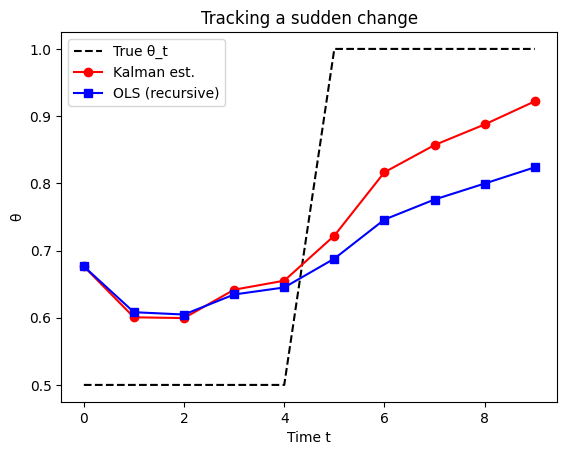

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kalman import create_discounted_kalman

np.random.seed(0)
T = 10
theta_true = np.array([0.5]*5 + [1.0]*5)
x = np.ones(T)
y = theta_true * x + 0.1*np.random.randn(T)

# Kalman filter with medium adaptation
kf = create_discounted_kalman(k=1, R=0.01, delta=0.8)
theta_est = []

for t in range(T):
    _, _, th = kf.step([x[t]], y[t])
    theta_est.append(th[0])

# OLS estimates up to each time
theta_ols = [np.linalg.lstsq(x[:t+1,None], y[:t+1], rcond=None)[0][0] for t in range(T)]

plt.plot(theta_true, 'k--', label='True θ_t')
plt.plot(theta_est, 'r-o', label='Kalman est.')
plt.plot(theta_ols, 'b-s', label='OLS (recursive)')
plt.xlabel('Time t')
plt.ylabel('θ')
plt.title('Tracking a sudden change')
plt.legend()
plt.show()
